# TD Learning Agent in a Gridworld Environment

This notebook demonstrates the implementation of a Temporal Difference (TD) learning agent within a simple gridworld environment. TD learning is a key concept in reinforcement learning, and this notebook provides a practical example of how an agent can learn to navigate through a grid to reach a goal while avoiding obstacles.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import heapq

## Gridworld Environment Class

The `Gridworld` class represents a simple grid environment where an agent can navigate through cells. The environment has a start position, a goal position, and obstacles.

In [2]:
class GridWorld:
    def __init__(self, size=5):
        self.size = size
        self.agent_pos = (0, 0)
        self.goal = (9, 2)
        self.obstacles = {(0,1),(2,0),(1,2),(2,2),(4,2),(4,3),(4,4),(4,0),(4,1),(4,5),(3,6),(8,3),(9,3),(7,3)}
        self.validate_positions()

    def validate_positions(self):
        if self.agent_pos in self.obstacles or self.agent_pos == self.goal:
            raise ValueError("Agent's initial position cannot be on an obstacle or the goal.")

    def visualize(self, path=None):
        fig, ax = plt.subplots()
        ax.set_xticks(np.arange(-0.5, self.size, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, self.size, 1), minor=True)
        ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

        ax.set_xticks(np.arange(0, self.size, 1))
        ax.set_yticks(np.arange(0, self.size, 1))

        for obstacle in self.obstacles:
            rect = Rectangle(obstacle, 1, 1, linewidth=1, edgecolor='red', facecolor='red')
            ax.add_patch(rect)

        rect = Rectangle(self.goal, 1, 1, linewidth=1, edgecolor='green', facecolor='green')
        ax.add_patch(rect)

        if path:
            for position in path:
                rect = Rectangle(position, 1, 1, linewidth=1, edgecolor='blue', facecolor='blue', alpha=0.5)
                ax.add_patch(rect)

        plt.plot(self.agent_pos[1] + 0.5, self.agent_pos[0] + 0.5, marker='o', markersize=10, color='black')
        plt.show()

## TD Learning Agent Class

The `TDAgent` class encapsulates the behavior of the TD learning agent, including choosing actions and updating its knowledge based on received rewards.

In [3]:
class TDLearning:
    def __init__(self, num_states, num_actions, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
        self.num_states = num_states
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.Q_table = np.zeros((num_states, num_actions))

    def choose_action(self, state):
        return np.argmax(self.Q_table[state])

    def update_q_value(self, state, action, reward, next_state):
        current_q = self.Q_table[state, action]
        next_q = np.max(self.Q_table[next_state])
        new_q = current_q + self.learning_rate * (reward + self.discount_factor * next_q - current_q)
        self.Q_table[state, action] = new_q


## Setup Environment and Agent

In this section, we initialize the gridworld environment and the TD learning agent with appropriate parameters.

In [4]:
# TD learning loop
GRID_SIZE = 10
NUM_ACTIONS = 4
NUM_EPISODES = 1000
STOP_THRESHOLD = 1e-3
STOP_WINDOW = 25

grid_world = GridWorld(GRID_SIZE)
td_learning = TDLearning(GRID_SIZE**2, NUM_ACTIONS)

episode_rewards = []

## Training the Agent

Here, we train the TD learning agent over a series of episodes, updating its knowledge after each episode.

In [5]:
for episode in range(NUM_EPISODES):
    grid_world.agent_pos = (0, 0)
    total_reward = 0

    while grid_world.agent_pos != grid_world.goal:
        state = grid_world.agent_pos[0] * GRID_SIZE + grid_world.agent_pos[1]
        action = td_learning.choose_action(state)

        next_pos = grid_world.agent_pos
        if action == 0 and grid_world.agent_pos[0] > 0:
            next_pos = (grid_world.agent_pos[0] - 1, grid_world.agent_pos[1])
        elif action == 1 and grid_world.agent_pos[0] < GRID_SIZE - 1:
            next_pos = (grid_world.agent_pos[0] + 1, grid_world.agent_pos[1])
        elif action == 2 and grid_world.agent_pos[1] > 0:
            next_pos = (grid_world.agent_pos[0], grid_world.agent_pos[1] - 1)
        elif action == 3 and grid_world.agent_pos[1] < GRID_SIZE - 1:
            next_pos = (grid_world.agent_pos[0], grid_world.agent_pos[1] + 1)

        reward = -1
        if next_pos in grid_world.obstacles:
            reward = -20  # Update obstacle reward to -20
        elif next_pos == grid_world.goal:
            reward = 100  # Update goal reward to 100

        next_state = next_pos[0] * GRID_SIZE + next_pos[1]
        td_learning.update_q_value(state, action, reward, next_state)
        total_reward += reward
        grid_world.agent_pos = next_pos

    episode_rewards.append(total_reward)

    # Check if the mean of the absolute differences in rewards over the last 25 episodes is less than the threshold
    if episode >= STOP_WINDOW and np.mean(np.abs(np.diff(episode_rewards[-STOP_WINDOW:]))) < STOP_THRESHOLD:
        print(f"Stopping training at episode {episode + 1} as rewards are not improving significantly.")
        break

Stopping training at episode 184 as rewards are not improving significantly.


## Plotting Rewards

This plot shows the total rewards accumulated by the agent in each episode, providing insight into the learning progress over time.

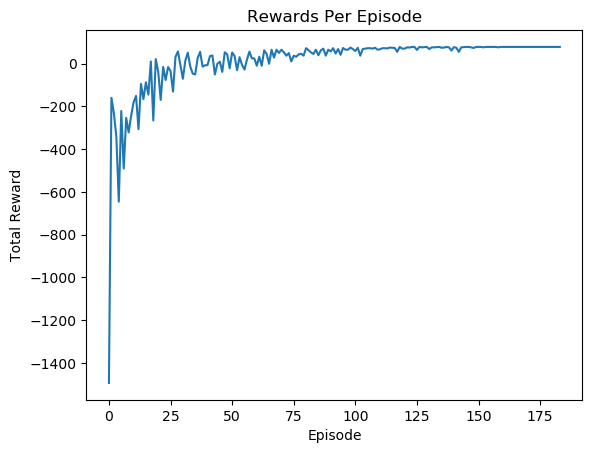

In [6]:
plt.plot(episode_rewards)
plt.title('Rewards Per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()


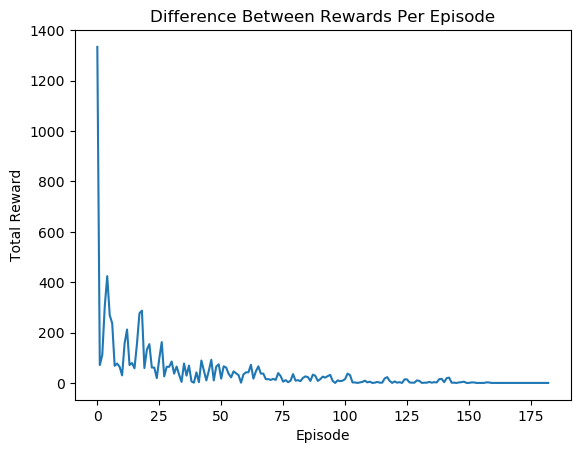

In [7]:
absolute_differences = [abs(second - first) for first, second in zip(episode_rewards, episode_rewards[1:])]
plt.plot(absolute_differences)
plt.title('Difference Between Rewards Per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

## Path Finding and Visualization

After the agent is trained, we find the path it takes from the start to the goal and visualize this path on the grid.

Optimal Path:


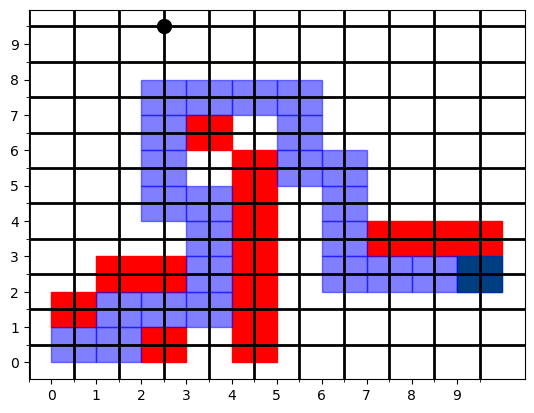

In [8]:
# Visualize the optimal path based on the final Q-table
print("Optimal Path:")
grid_world.agent_pos = (0, 0)
optimal_path_positions = [grid_world.agent_pos]

while grid_world.agent_pos != grid_world.goal:
    state = grid_world.agent_pos[0] * GRID_SIZE + grid_world.agent_pos[1]
    action = td_learning.choose_action(state)

    next_pos = grid_world.agent_pos
    if action == 0 and grid_world.agent_pos[0] > 0:
        next_pos = (grid_world.agent_pos[0] - 1, grid_world.agent_pos[1])
    elif action == 1 and grid_world.agent_pos[0] < GRID_SIZE - 1:
        next_pos = (grid_world.agent_pos[0] + 1, grid_world.agent_pos[1])
    elif action == 2 and grid_world.agent_pos[1] > 0:
        next_pos = (grid_world.agent_pos[0], grid_world.agent_pos[1] - 1)
    elif action == 3 and grid_world.agent_pos[1] < GRID_SIZE - 1:
        next_pos = (grid_world.agent_pos[0], grid_world.agent_pos[1] + 1)

    optimal_path_positions.append(next_pos)
    grid_world.agent_pos = next_pos

# Visualize the grid with the optimal path
grid_world.visualize(optimal_path_positions)


## Adding Astar

Lets add the A* Algorithm to our code base and see what the output using that looks like. To prove that our RL agent did get the perfect path!

Optimal Path from A* Algorithm:


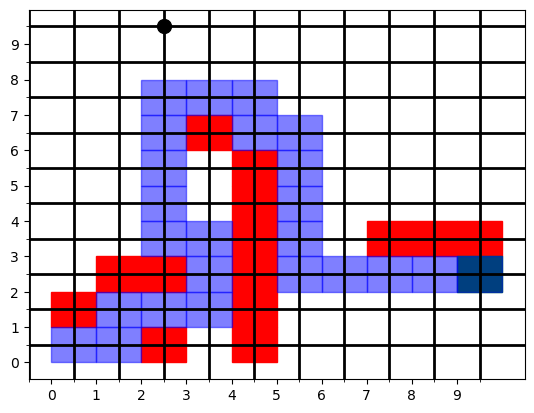

In [9]:
class AStar:
    def __init__(self, grid_world):
        self.grid_world = grid_world
        self.goal = grid_world.goal
        self.obstacles = grid_world.obstacles

    def heuristic(self, pos):
        return abs(pos[0] - self.goal[0]) + abs(pos[1] - self.goal[1])

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        for direction in directions:
            next_pos = (pos[0] + direction[0], pos[1] + direction[1])
            if 0 <= next_pos[0] < self.grid_world.size and 0 <= next_pos[1] < self.grid_world.size:
                if next_pos not in self.obstacles:
                    neighbors.append(next_pos)
        return neighbors

    def find_path(self):
        start = (0, 0)
        frontier = [(self.heuristic(start), start)]
        came_from = {start: None}
        cost_so_far = {start: 0}

        while frontier:
            current = heapq.heappop(frontier)[1]

            if current == self.goal:
                break

            for next in self.get_neighbors(current):
                new_cost = cost_so_far[current] + 1
                if next not in cost_so_far or new_cost < cost_so_far[next]:
                    cost_so_far[next] = new_cost
                    priority = new_cost + self.heuristic(next)
                    heapq.heappush(frontier, (priority, next))
                    came_from[next] = current

        path = []
        current = self.goal
        while current != start:
            path.append(current)
            current = came_from[current]
        path.append(start)
        path.reverse()
        return path

# A* Pathfinding
a_star = AStar(grid_world)
a_star_path = a_star.find_path()

# Visualize the grid with the A* optimal path
print("Optimal Path from A* Algorithm:")
grid_world.visualize(a_star_path)

## Introducing New Gridworld

Let us see if our model has been able to generalise for any random grid world or is only specific to this grid world!

Path in New Grid World Based on Previous TD Learning:


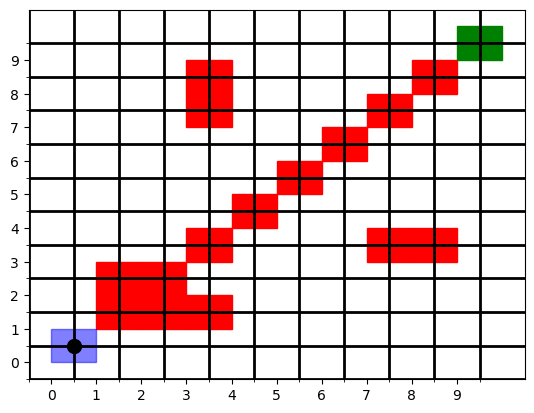

In [10]:
class GridWorldNew(GridWorld):
    def __init__(self, size=10):
        super().__init__(size)
        self.obstacles = {(1,1), (1,2), (2,1), (2,2), (3,1), (3,3), (4,4), (5,5), (6,6), (7,7), (8,8), (3,7), (3,8), (7,3), (8,3)}
        self.goal = (9, 9)
        self.validate_positions()

# Initialize the new grid world
new_grid_world = GridWorldNew(GRID_SIZE)

# Use the same Q-table from the previous TD Learning for the new grid world
new_td_learning = TDLearning(GRID_SIZE**2, NUM_ACTIONS)
new_td_learning.Q_table = td_learning.Q_table.copy()

# Visualize the path in the new grid world based on the existing Q-table
print("Path in New Grid World Based on Previous TD Learning:")
new_optimal_path_positions = [new_grid_world.agent_pos]
# Compute the path using the previous TD Learning Q-table...
new_grid_world.visualize(new_optimal_path_positions)

As we can see the new grid world did not reach its goal! Let us see what A* does!

Optimal Path in New Grid World from A* Algorithm:


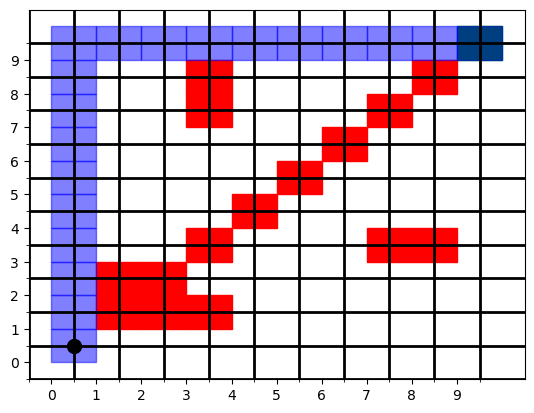

In [11]:
# A* Pathfinding in the new grid world
new_a_star = AStar(new_grid_world)
new_a_star_path = new_a_star.find_path()

# Visualize the optimal path from A* in the new grid world
print("Optimal Path in New Grid World from A* Algorithm:")
new_grid_world.visualize(new_a_star_path)

## Conclusion

Summarize the key findings and observations made in this notebook, and discuss potential extensions or applications of the implemented TD learning agent and gridworld environment.